# AI and Data Science Track 

## Session 6 in : Databases and SQL for Data Science with python 

<b></b>

<b></b>

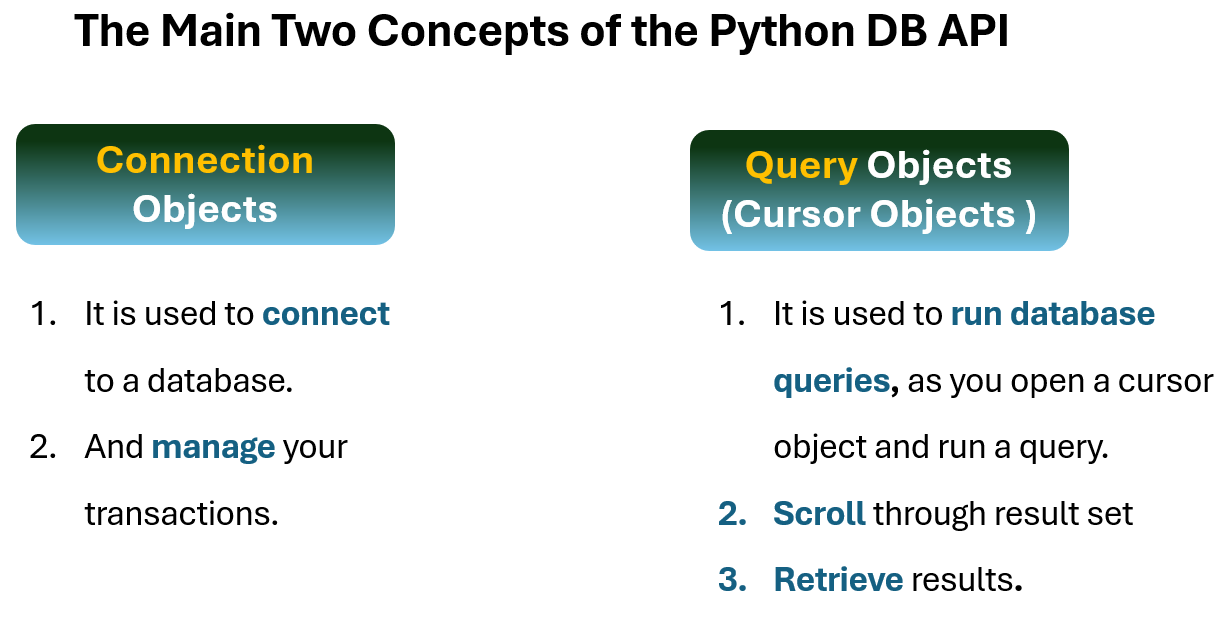

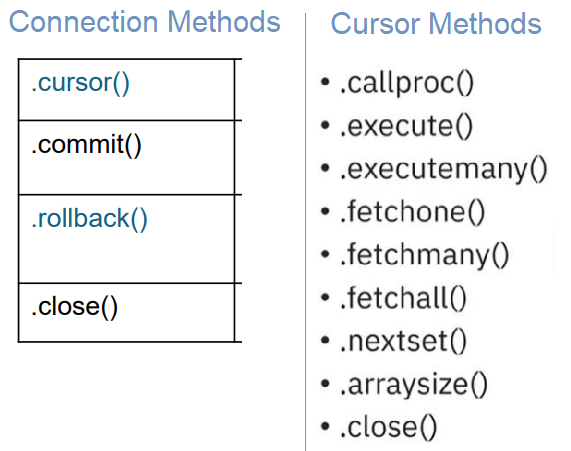

### Lesson 1: Connect, Execute, Close  

In [1]:
#import sqlite module  
import sqlite3 

In [2]:
# connect to an exists database or create a new one 
db = sqlite3.connect('app.db') 

In [3]:
db

note that a new sqlite database file has been created in your current working directory


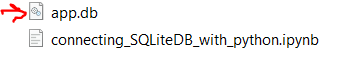

In [4]:
# Create the table, using execute SQL commmand 
db.execute("CREATE TABLE if not exists skills (name text, progress integer, user_id integer)") 


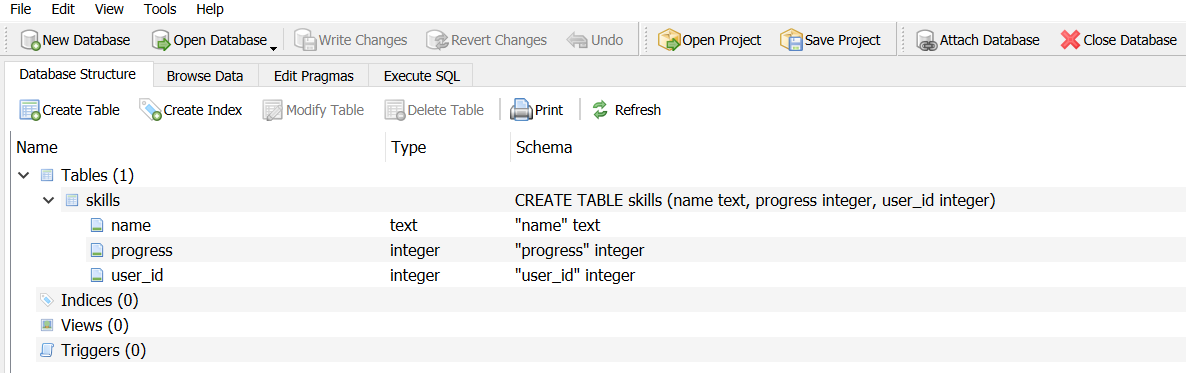

<b></b>


<b></b>


<b></b>

### Lesson 2 : Insert data into a SQLite database 

In [5]:
# setting up a cursor  to be used to conduct the operations over the DB 
crsr = db.cursor()

In [6]:
# create the 'skills' tables the same as before but using cursor 
crsr.execute("CREATE TABLE if not exists skills (name text, progress integer, user_id integer)") 

DB for now 

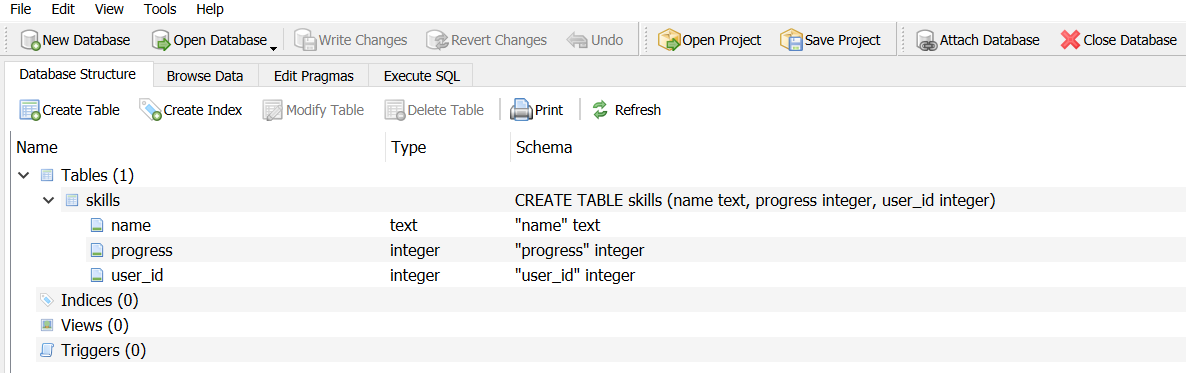

In [7]:
# create another table: 
crsr.execute("CREATE TABLE if not exists users(user_id integer, name text)")

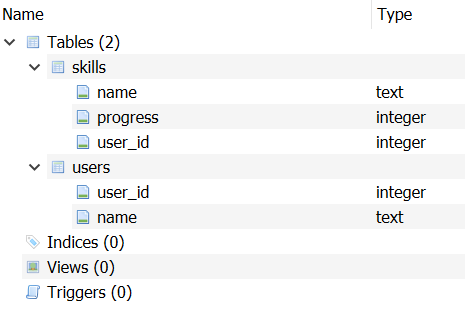

In [8]:
# Inserting Data in tables 
crsr.execute("insert into users(user_id, name) values (1,'ahmed')")
crsr.execute("insert into users(user_id, name) values (2,'Mohamed')")
crsr.execute("insert into users(user_id, name) values (3,'ALi')")
crsr.execute("insert into users(user_id, name) values (4,'Youssef')")


note that: nothing has changed untill now even that the queries run successfully ?!!  

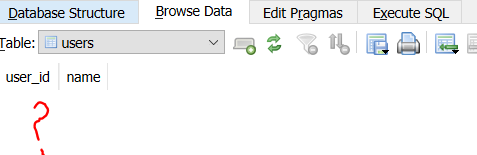

The answer of the why question is that: because you must **commit** the change you made 

In [9]:
# Commit the changes using the connection object 
db.commit()

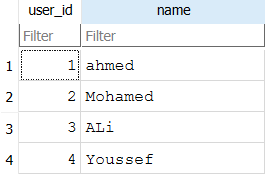

<b> </b>


<b> </b>



### Task 1

- create a list of names 
- loop over the list and add these values in the database 

In [10]:
lst = ["Mostafa", "Abdelaziz", "Amr","Bavly","Ramy","Mahmoud","Sama","Heba","Malak","Marly","Amjad"]

In [11]:
for i in range(len(lst)):
    qry_str = f"insert into users(user_id, name) values ({i},'{lst[i]}')"
    crsr.execute(qry_str)


In [12]:
# Commit the changes using the connection object 
db.commit()

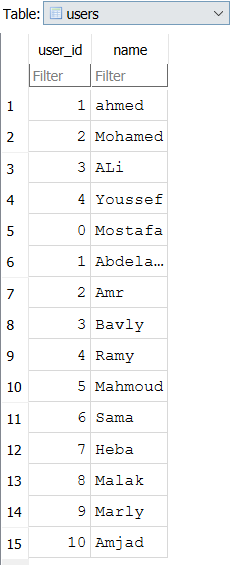

Another implementation 

In [13]:
for key, value in enumerate(lst):
    print(f"user_id: {key}, name: {value}")

user_id: 0, name: Mostafa
user_id: 1, name: Abdelaziz
user_id: 2, name: Amr
user_id: 3, name: Bavly
user_id: 4, name: Ramy
user_id: 5, name: Mahmoud
user_id: 6, name: Sama
user_id: 7, name: Heba
user_id: 8, name: Malak
user_id: 9, name: Marly
user_id: 10, name: Amjad


<b></b>


<b></b>

### Lesson 3 : Retreive Data from a SQLite Database 

In [14]:
# featch data using the cursor object (the query object) 

crsr.execute("select * from users")

print(crsr.fetchall()) # it returns a list of tuples 

[(1, 'ahmed'), (2, 'Mohamed'), (3, 'ALi'), (4, 'Youssef'), (0, 'Mostafa'), (1, 'Abdelaziz'), (2, 'Amr'), (3, 'Bavly'), (4, 'Ramy'), (5, 'Mahmoud'), (6, 'Sama'), (7, 'Heba'), (8, 'Malak'), (9, 'Marly'), (10, 'Amjad')]


In [15]:
print(crsr.fetchone())

None


to fetch a specific number of rows from the database 

In [16]:
# crsr.fetchmany(3)  

why **None** ?! 

- because there is no more data any more, the cursor is like a pointer 

</b>

</b>

### Lesson 4 : Close the connection 

In [17]:
#using the connection object 
db.close()

</b>


</b>




### Task 2 : Mix all together Full Example 

In [18]:
def get_all_data():
    try:
        # connect to the database 
        db = sqlite3.connect('app.db') 

        print(f"===== Connected sucessfully to the database =====")

        # intialize a cursor object (query object) 
        crsr = db.cursor() 

        # fetch all the users from the database 
        crsr.execute("select * from users")
        results = crsr.fetchall() # it returns a list of tuples 
        
        # print the number of the rows in the results 
        print(f"Database has {len(results)} rows ") 

        print("=================================================")

        print("logging the data in rowws ....")

        for row in results: 
            print(f"user_id => {row[0]}, name => {row[1]}")

    except sqlite3.Error as err: 
        print(f"Error reading data from the database")
        print(err)
    
    finally:  # it run in all cases 
        #close the connection
        db.close()

In [19]:
get_all_data()

===== Connected sucessfully to the database =====
Database has 15 rows 
logging the data in rowws ....
user_id => 1, name => ahmed
user_id => 2, name => Mohamed
user_id => 3, name => ALi
user_id => 4, name => Youssef
user_id => 0, name => Mostafa
user_id => 1, name => Abdelaziz
user_id => 2, name => Amr
user_id => 3, name => Bavly
user_id => 4, name => Ramy
user_id => 5, name => Mahmoud
user_id => 6, name => Sama
user_id => 7, name => Heba
user_id => 8, name => Malak
user_id => 9, name => Marly
user_id => 10, name => Amjad


</b>


</b>


</b>


### Lesson 5 : Update and Delete data from a SQLite Database 

In [20]:
def get_all_users():
    # fetch all the users from the database 
    crsr.execute("select * from users")
    results = crsr.fetchall() # it returns a list of tuples 

    print("=================================================")
    print("logging the data in rowws ....")
    print("=================================================")

    for row in results: 
        print(f"user_id => {row[0]}, name => {row[1]}")

In [21]:
# connect to the database 
db = sqlite3.connect('app.db') 


# intialize a cursor object (query object) 
crsr = db.cursor() 

In [22]:
get_all_users()

logging the data in rowws ....
user_id => 1, name => ahmed
user_id => 2, name => Mohamed
user_id => 3, name => ALi
user_id => 4, name => Youssef
user_id => 0, name => Mostafa
user_id => 1, name => Abdelaziz
user_id => 2, name => Amr
user_id => 3, name => Bavly
user_id => 4, name => Ramy
user_id => 5, name => Mahmoud
user_id => 6, name => Sama
user_id => 7, name => Heba
user_id => 8, name => Malak
user_id => 9, name => Marly
user_id => 10, name => Amjad


In [23]:
# update query 

crsr.execute("update users set name = 'DEPI' where user_id = 1 ") 

In [24]:
get_all_users()

logging the data in rowws ....
user_id => 1, name => DEPI
user_id => 2, name => Mohamed
user_id => 3, name => ALi
user_id => 4, name => Youssef
user_id => 0, name => Mostafa
user_id => 1, name => DEPI
user_id => 2, name => Amr
user_id => 3, name => Bavly
user_id => 4, name => Ramy
user_id => 5, name => Mahmoud
user_id => 6, name => Sama
user_id => 7, name => Heba
user_id => 8, name => Malak
user_id => 9, name => Marly
user_id => 10, name => Amjad


In [27]:
crsr.execute("delete from users where name in ('DEPI','Mohamed','ALi','Youssef')")

get_all_users()

logging the data in rowws ....
user_id => 0, name => Mostafa
user_id => 2, name => Amr
user_id => 3, name => Bavly
user_id => 4, name => Ramy
user_id => 5, name => Mahmoud
user_id => 6, name => Sama
user_id => 7, name => Heba
user_id => 8, name => Malak
user_id => 9, name => Marly
user_id => 10, name => Amjad
